<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/ANN_MSE_RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    float64
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    float64
 7   Mg          487 non-null    float64
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
dtypes: float64(15)
memory usage: 57.2 KB


In [5]:
df.dropna(inplace=True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
dtypes: float64(15)
memory usage: 60.6 KB


In [7]:
data=df
data.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831


In [8]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [9]:
X = df.drop('WPI', axis = 1)
y = df['WPI']

In [10]:
X.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000


In [11]:
y.head()

0    0.249528
1    0.216400
2    0.183814
3    0.219282
4    0.165831
Name: WPI, dtype: float64

In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
# Scaling Data for ANN
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
# Number of features to input
num_features = len(X_train[1,:])

In [15]:
# ANN with Keras
np.random.seed(10)
classifier = Sequential()
     # better values with tanh against relu, sigmoid...
classifier.add(Dense(13, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features)) 
classifier.add(Dense(1, kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'sgd', loss = 'mean_squared_error')        # metrics=['mse','mae']
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)  # ignored
history_mse = classifier.fit(X_train, y_train, epochs = 100, callbacks = [early_stopping_monitor], verbose = 0, validation_split = 0.2)

print('Loss:    ', history_mse.history['loss'][-1], '\nVal_loss: ', history_mse.history['val_loss'][-1])

Loss:     0.0017205982003360987 
Val_loss:  0.0007422505295835435


In [16]:
# EVALUATE MODEL IN THE TEST SET
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

# EVALUATE MODEL IN THE TRAIN SET
score_mse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.0023
Test Score: 0.0022551126312464476
13/13 [==============================] - 0s 2ms/step - loss: 0.0015
Train Score: 0.0014963203575462103


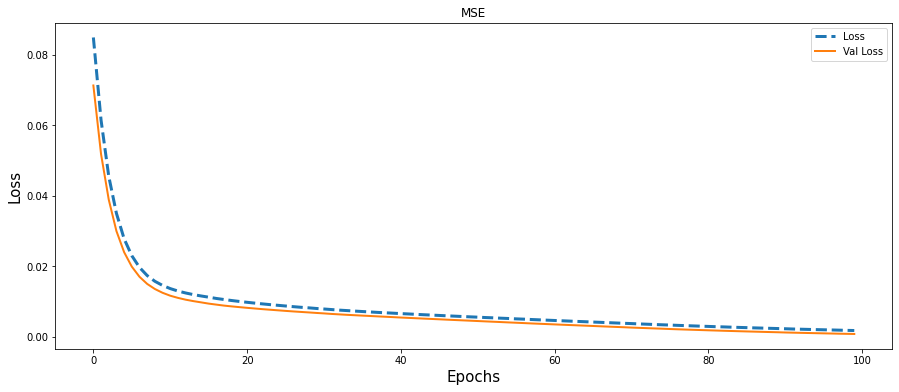

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('MSE')
plt.legend()

In [18]:
#Converting the first line of the dataset
a1= np.array([8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211]).reshape(1,-1)
# Scaling the first line to the same pattern used in the model
a1 = sc_X.transform(a1)
# Predicted value by model
y_pred_mse_1 = classifier.predict(a1)
print('Predicted value: ',y_pred_mse_1)
print('Real value: ','0.249528')

Predicted value:  [[0.23947166]]
Real value:  0.249528


In [19]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [20]:
# ANN with Keras
np.random.seed(10)
classifier = Sequential()
     # better values with tanh agains relu, sigmoid...
classifier.add(Dense(13, kernel_initializer = 'uniform', activation = 'tanh', input_dim = num_features)) 
classifier.add(Dense(1, kernel_initializer = 'uniform'))
classifier.compile(optimizer = 'sgd', loss = root_mean_squared_error)        # metrics=['mse','mae']
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=500)  # ignored
history = classifier.fit(X_train, y_train, epochs = 100, callbacks = [early_stopping_monitor], verbose = 0, validation_split = 0.2)

print('Loss:    ', history.history['loss'][-1], '\nVal_loss: ', history.history['val_loss'][-1])

Loss:     0.006473151966929436 
Val_loss:  0.007293923757970333


In [21]:
# EVALUATE MODEL IN THE TEST SET
score_rmse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_rmse_test)

# EVALUATE MODEL IN THE TRAIN SET
score_rmse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_rmse_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.0101
Test Score: 0.01014269795268774
13/13 [==============================] - 0s 1ms/step - loss: 0.0084
Train Score: 0.008397954516112804


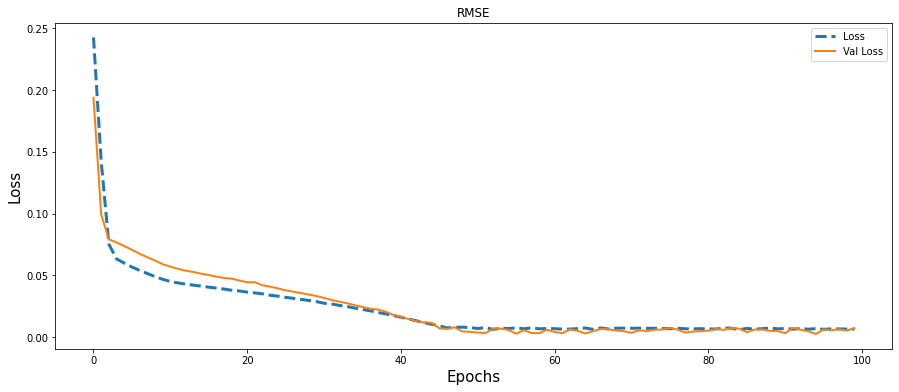

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('RMSE')
plt.legend()

In [27]:
#Converting the first line of the dataset
a2= np.array([8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211]).reshape(1,-1)
# Scaling the first line to the same pattern used in the model
a2 = sc_X.transform(a2)
# Predicted value by model
y_pred_rmse_1 = classifier.predict(a2)
print('Predicted value: ',y_pred_rmse_1)
print('Real value: ','0.249528')

Predicted value:  [[0.24133876]]
Real value:  0.249528


In [28]:
y_pred_rmse_1

array([[0.24133876]], dtype=float32)

In [26]:
y_pred_mse_1

array([[0.23947166]], dtype=float32)

In [29]:
models = pd.DataFrame({
    'Model': ['Test  Set Score', 'Train Set Score', 'Predict first Line [0.24958]','Last Epoch Loss', 'Last Epoch Val Loss'],
    'MSE': [np.sqrt(score_mse_test), np.sqrt(score_mse_train), y_pred_mse_1[0],np.sqrt(history_mse.history['loss'][-1]), np.sqrt(history_mse.history['val_loss'][-1])],
    'RMSE': [score_rmse_test, score_rmse_train, y_pred_rmse_1[0],history.history['loss'][-1],history.history['val_loss'][-1]]
})
models

,Model,MSE,RMSE
0,Test Set Score,0.047488,0.0101427
1,Train Set Score,0.0386823,0.00839795
2,Predict first Line [0.24958],[0.23947166],[0.24133876]
3,Last Epoch Loss,0.0414801,0.00647315
4,Last Epoch Val Loss,0.0272443,0.00729392
